# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Get  number of rows and columns.
df_number_of_rows, df_number_of_columns = df.shape

print(f'The data frame contains {df_number_of_rows} rows and {df_number_of_columns} columns.')

The data frame contains 1898 rows and 9 columns.


#### Observations:
1. The dataframe has 1898 rows, which represent orders, and 9 columns, which represent features that describe the orders.

2. While the dataframe is relatively small, its size allows for a focused analysis. However, it is important to recognize that there may be other important columns that are not captured by the dataframe.

3. Because there are only 1898 rows in the dataframe, it can be easily loaded into memory and processed by most computers without performance issues.

4. This is a good starting point, but we would have to dive deeper in the data to develop more meaningful insights.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Prints a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. There are no missing values.
2. There are 4 objects, 1 float, and 4 integers.
3. The rating column contains ordinal categorical values, even though its data type is listed as object.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# gives some information on columns types and number of null values
tab_info = pd.concat([pd.DataFrame(df.dtypes).T.rename(index={0:'column type'}), 
                      pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}), 
                      pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'})])

display(tab_info)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
column type,int64,int64,object,object,float64,object,object,int64,int64
null values (nb),0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Get value counts of the rating column
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
1. Initially, it appears that there are no null values in the data. However, upon closer inspection of the rating column, we see a value of "Not given" (736 orders) that hides the presence of a missing value, which is not accounted for in the output of df.isnull().sum(). Although we should take note of this, there is no immediate need to take action.

2. During univariate analysis, we may determine that it is necessary to use a technique to handle missing values that are masked by other values such as "Not given".

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Statistical summary
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
1. The time it takes for food to be prepared once an order is placed ranges from 20 minutes to 35 minutes. With an average of 27.4 minutes.
2. 68% of the observed orders have a prep time between 22.7 and 32.0 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Get value counts for rating column
df_counts = df['rating'].value_counts().reset_index()
df_counts.columns = ['rating', 'count']

# Add column with relative percentage
df_counts['relative_percentage']= df_counts['count']/df_counts['count'].sum()

df_counts



,rating,count,relative_percentage
0,Not given,736,0.387777
1,5,588,0.309800
2,4,386,0.203372
3,3,188,0.099052


#### Observations:
1. The dataset contains 736 observations that do not have a rating. This accounts for 39% of the total number of observations and is the most frequent rating value in the dataset.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Categorical

#### Summary

In [9]:
# Get summary statistics of categorical columns
df.describe(exclude='number').T

# Get list of all categorical variables 
cat_col = list(df.select_dtypes(exclude=['number']).columns)


# Get value counts of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    
    print('-' * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
Not given    736
5        

#### Observation
1. order_id is unique
2. There are repeating customers
3. There are restaurants with one order
4. The cuisine type with the lowest orders is 7.
5. Day of the week has two values: Weekend and Weekday.
6. The "Rating" column has a total of 4 possible values, with one of them being "Not given". This particular value is used to indicate missing data.

In [10]:
# Get count of unique order IDs and total orders.
unique_order_id = df.order_id.nunique()
total_orders = df.order_id.count()

print("unique_order_id: ", unique_order_id)
print("total_orders: ", total_orders)
print("Min: ", df.order_id.min()," | ","Max: ",df.order_id.max())


unique_order_id:  1898
total_orders:  1898
Min:  1476547  |  Max:  1478444


#### Observations:
1. All unique values ranging from 1476547 to 478444

In [11]:
customer_id = df.customer_id.nunique()
total_customers = df.customer_id.count()

print("unique_customer_id: ", customer_id)
print("total_customers: ", total_customers)
print("Min: ", df.customer_id.min()," | ","Max: ",df.customer_id.max())

df.customer_id.dtype

unique_customer_id:  1200
total_customers:  1898
Min:  1311  |  Max:  405334


dtype('int64')

#### Observations:
1. There are repeat customer ids ranging from 1311 to 405334.

#### Visuals

In [12]:
# Count the number of occurrences of each restaurant name and reset the index
count_restaurant_name = df['restaurant_name'].value_counts().reset_index()
count_restaurant_name.columns = ['restaurant_name', 'count']
# Calculate the relative percentage of each restaurant name
count_restaurant_name['relative_percentage'] = count_restaurant_name['count'] / count_restaurant_name['count'].sum()
# Calculate the cumulative percentage of each restaurant name
count_restaurant_name['cumulative_percentage'] = count_restaurant_name['relative_percentage'].cumsum()

In [13]:
count_restaurant_name.head(5)

,restaurant_name,count,relative_percentage,cumulative_percentage
0,Shake Shack,219,0.115385,0.115385
1,The Meatball Shop,132,0.069547,0.184932
2,Blue Ribbon Sushi,119,0.062698,0.247629
3,Blue Ribbon Fried Chicken,96,0.050580,0.298209
4,Parm,68,0.035827,0.334036


In [14]:
count_restaurant_name.tail(5)

,restaurant_name,count,relative_percentage,cumulative_percentage
173,Sushi Choshi,1,0.000527,0.997893
174,Dos Caminos Soho,1,0.000527,0.998419
175,La Follia,1,0.000527,0.998946
176,Philippe Chow,1,0.000527,0.999473
177,'wichcraft,1,0.000527,1.000000


In [15]:
count_restaurant_name[count_restaurant_name['count'] == 1].sum()

restaurant_name          Le Zie 2000 TrattoriaCafe de La EsquinaSarabet...
count                                                                   50
relative_percentage                                               0.026344
cumulative_percentage                                            49.354584
dtype: object

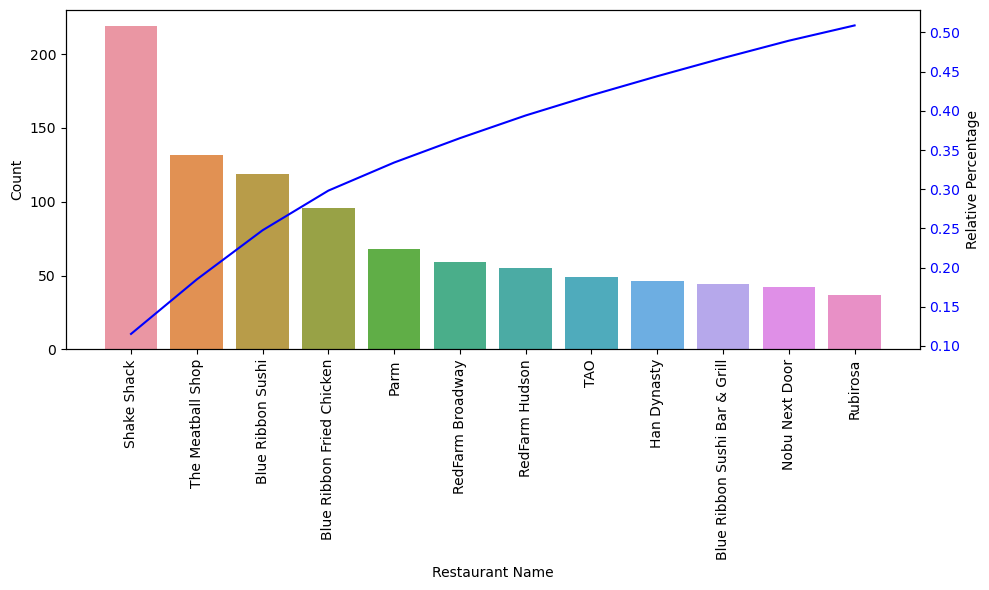

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for count
sns.barplot(x='restaurant_name', y='count', data=count_restaurant_name[0:12], ax=ax)
ax.set_xlabel('Restaurant Name')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=90)

# Create a line plot for relative percentage on secondary y-axis. Display only top 12 restaurant names.
ax2 = ax.twinx()
sns.lineplot(x='restaurant_name', y='cumulative_percentage', data=count_restaurant_name[0:12], ax=ax2, color='blue')
ax2.set_ylabel('Relative Percentage')
ax2.tick_params(axis='y', labelcolor='blue')

# Show the plot
plt.tight_layout()
plt.show()


#### Observations:
1. Shake Shack accounts for the most amount of orders (219) which is 12% of total orders.
2. There are 3% of restaurants with only a single order.
3. The top 12 restaurants accounts for 50% of the orders.

In [17]:
# Function to create barplots that indicates percentage for each category
def bar_perc(data, z):
    
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show() 

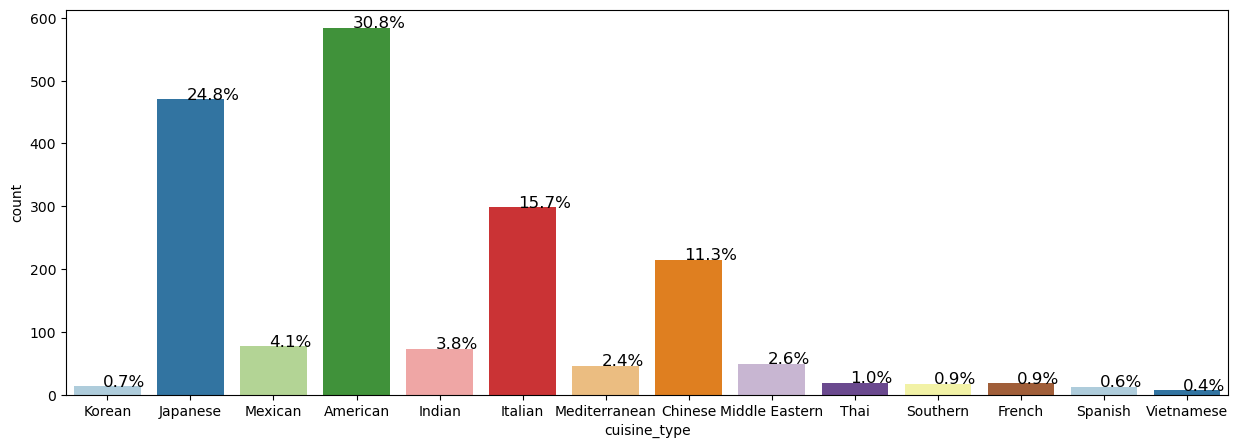

In [18]:
bar_perc(df, 'cuisine_type')

#### Observations:
1. The top three cuisine types are American, Japanese, and Italian and account for roughly 70% of total orders.

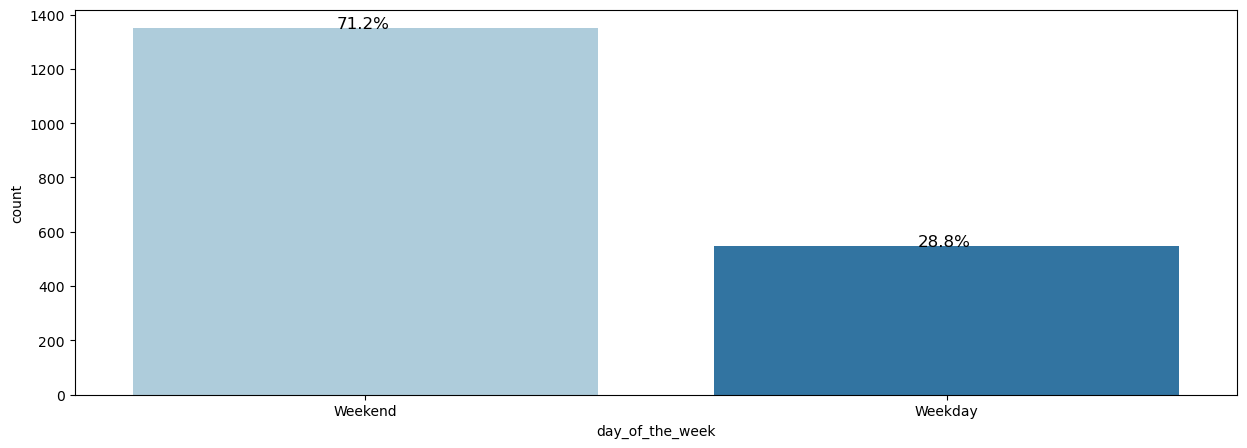

In [19]:
bar_perc(df, 'day_of_the_week')

#### Observations:
1. 71% of orders are placed on the weekend. And 29% of orders are placed on weekdays.

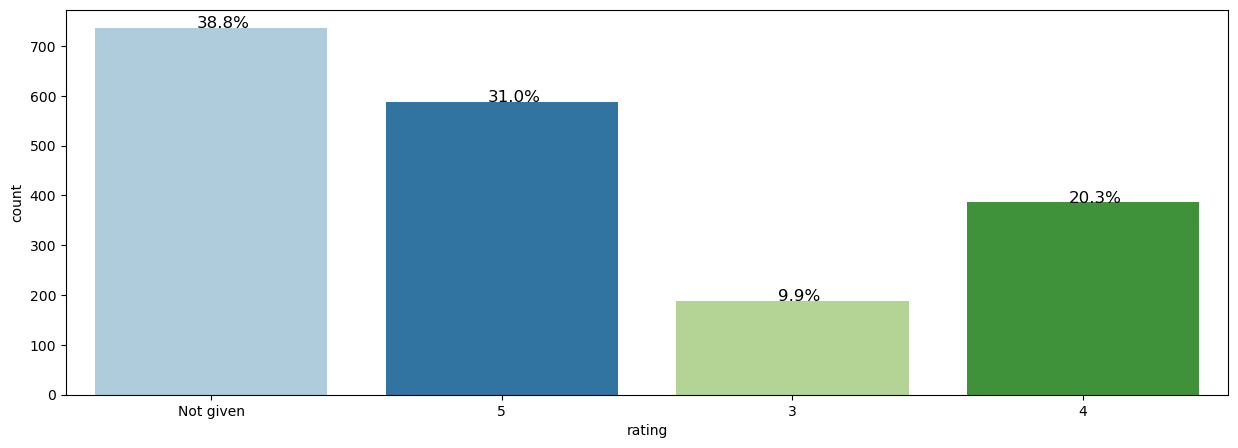

In [20]:
bar_perc(df, 'rating')

#### Observations:
1. 39% of orders do not have a rating.
2. All ratings are 3 or higher. This could mean that customers are having positive experiences with a rating of 3 or above, or it could suggest that customers are not reporting negative experiences when they have them.

In [21]:
# This function takes the numerical variable as the input and returns the boxplots and histograms for that variable

def histogram_boxplot(feature, figsize = (15,10), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,     # Number of rows of the subplot grid
                                           sharex = True, # The X-axis will be shared among all the subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    # Creating the subplots
    # Boxplot will be created and the mean value of the column is idicated by a triangle.
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color ='red')
    
    # For histogram
    sns.histplot(feature, kde = True, ax = ax_hist2, bins = bins) if bins else sns.histplot(feature, kde = True, ax = ax_hist2)
    ax_hist2.axvline(np.mean(feature), color = 'g', linestyle = '--')      # Add mean to the histogram as green dashes
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram as a black line

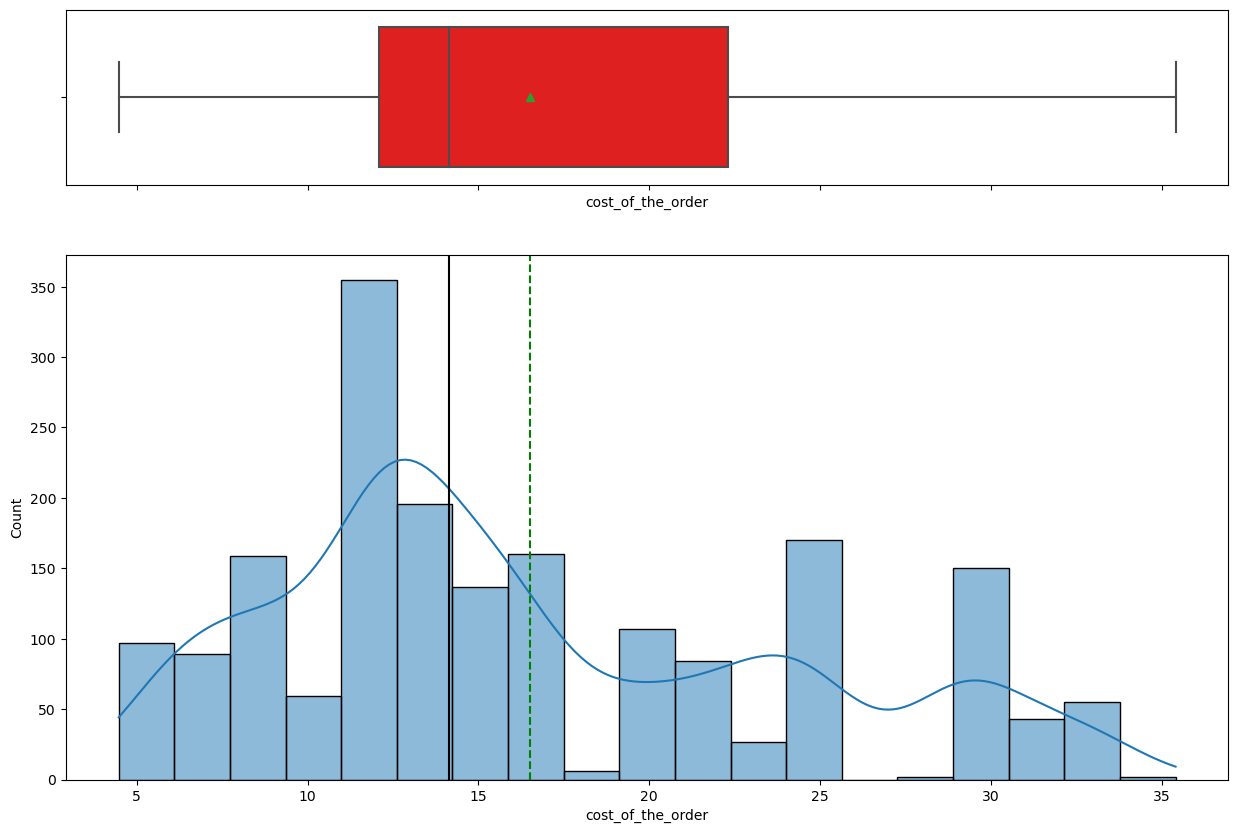

In [22]:
histogram_boxplot(df.cost_of_the_order)

#### Observations
1. Most orders are between `$5` and `$15`, but there are a few high cost orders that are driving up the mean.

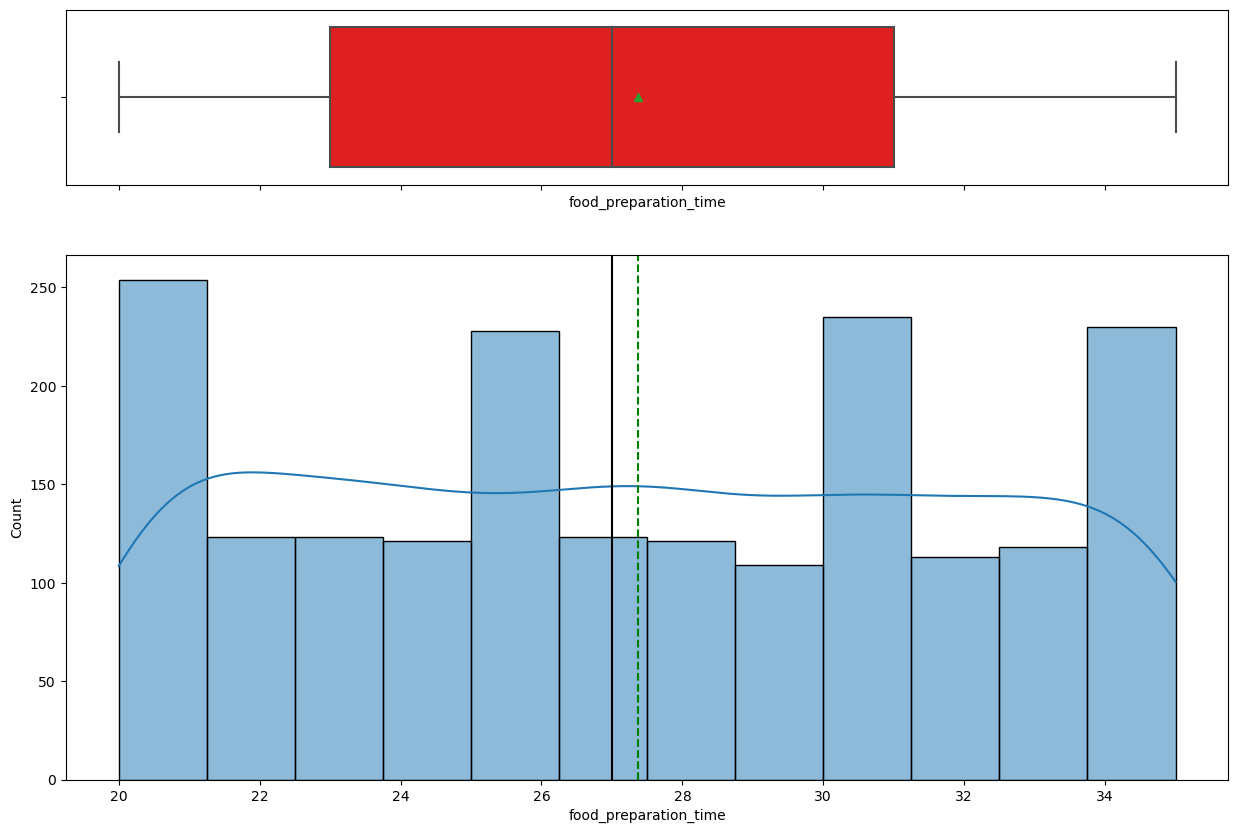

In [23]:
histogram_boxplot(df.food_preparation_time)

#### Observations
1. The food preparation time for the most part seems to be equally distributed from 20 to 35 with a few modes. This could indicate there are a few popular orders that have a specific prep time. Further exploration might be required.

#### Potential next steps: 
What are the big spikes in prep time?
Delivery time?
What does the data look like for data below 18 dollars?
at 18 or above?


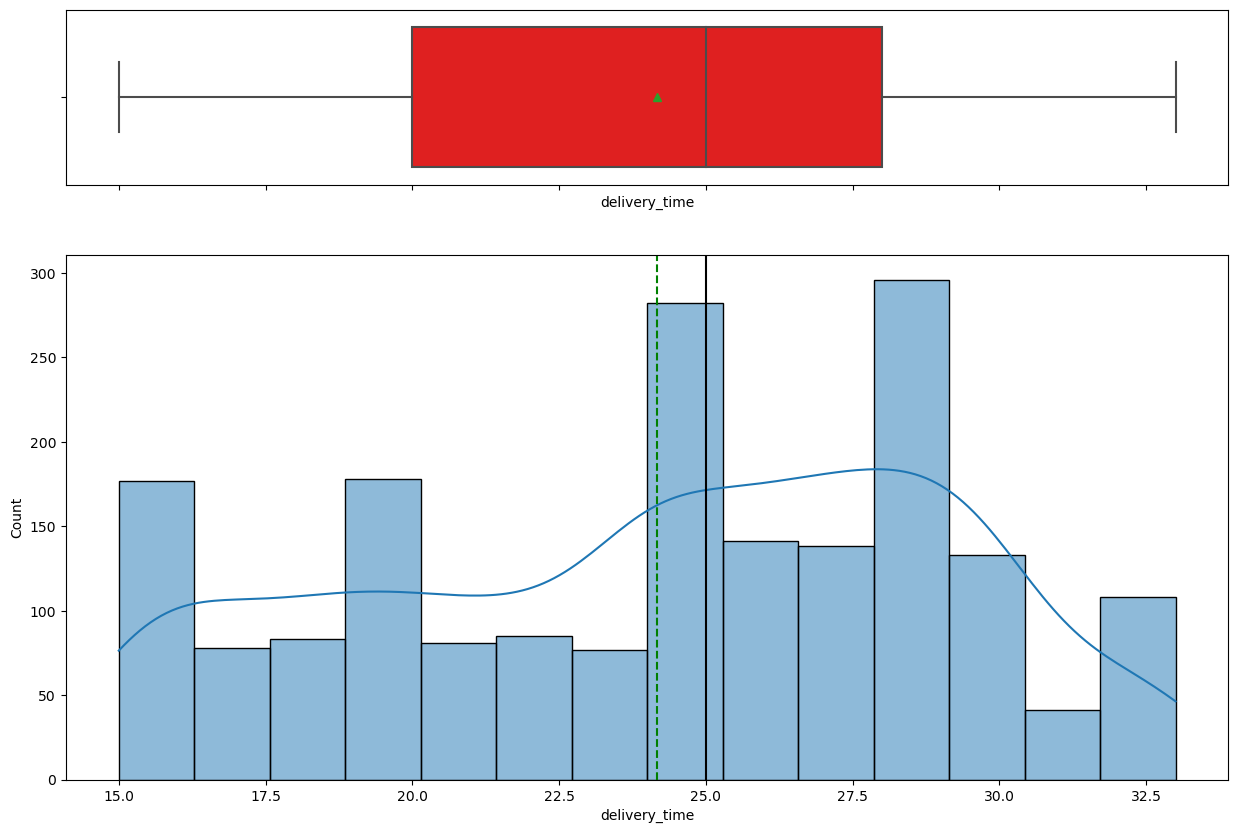

In [24]:
histogram_boxplot(df.delivery_time)

#### Observations
1. Most of the orders have a delivery time of 23 minutes or more. There are some fast delivery times that drive down the mean.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
count_restaurant_name.head(5)

,restaurant_name,count,relative_percentage,cumulative_percentage
0,Shake Shack,219,0.115385,0.115385
1,The Meatball Shop,132,0.069547,0.184932
2,Blue Ribbon Sushi,119,0.062698,0.247629
3,Blue Ribbon Fried Chicken,96,0.050580,0.298209
4,Parm,68,0.035827,0.334036


#### Observations:
1. The top 5 restaurants accounts for 33% of the orders. And Shake Shack has the most amount of placed orders at 219.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
# Filter weekend and get value counts for cuisine_type.
weekend_cuisine_types = df[df['day_of_the_week']=='Weekend'].cuisine_type.value_counts().reset_index()
weekend_cuisine_types.columns =['Cuisine Type', '# of orders']
# Calculate percentage of total orders by cuisine type. And calculate cumulative percentage.
weekend_cuisine_types['% of total'] = weekend_cuisine_types['# of orders'] / weekend_cuisine_types['# of orders'].sum()
weekend_cuisine_types['cumulative_percentage'] = weekend_cuisine_types['% of total'].cumsum()

weekend_cuisine_types[0:1]

,Cuisine Type,# of orders,% of total,cumulative_percentage
0,American,415,0.30718,0.30718


#### Observations:
1. American Cuisine is the most popular on weekends with 415 orders and accounting for 30% of total orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
# Get percentage of the orders that cost more thatn $20.
orders_under_20_dolalrs = df[df['cost_of_the_order']>20]['cost_of_the_order']

round(orders_under_20_dolalrs.count() / df.shape[0],2)

0.29

#### Observations:
1. Orders more than $20 accounts for 29% of total orders.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
# Get mean of order delivery time
round(df['delivery_time'].mean(),2)

24.16

#### Observations:
1. The mean delivery time is 24.2 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
# Get top 3 most fequent customers
df.customer_id.value_counts()[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
1. Top three customers have minimum of 9 and max of 13. The top three IDs are 52832, 47440, and 83287.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [30]:
# Convert order_id and customer_id to string.
df['order_id'] = df['order_id'].astype('string')
df['customer_id'] = df['customer_id'].astype('string')

# Get list of all categorical columns
df.select_dtypes(exclude='number').head()

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating
0,1477147,337525,Hangawi,Korean,Weekend,Not given
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,Weekend,Not given
2,1477070,66393,Cafe Habana,Mexican,Weekday,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,Weekend,3
4,1478249,76942,Dirty Bird to Go,American,Weekday,4


In [31]:
# Get list of numerical columns.
df.select_dtypes(include='number')

,cost_of_the_order,food_preparation_time,delivery_time
0,30.75,25,20
1,12.08,25,23
2,12.23,23,28
3,29.20,25,15
4,11.59,25,24
...,...,...,...
1893,22.31,31,17
1894,12.18,31,19
1895,25.22,31,24
1896,12.18,23,31


### Categorical Multivariate Analysis

<AxesSubplot:xlabel='day_of_the_week', ylabel='cuisine_type'>

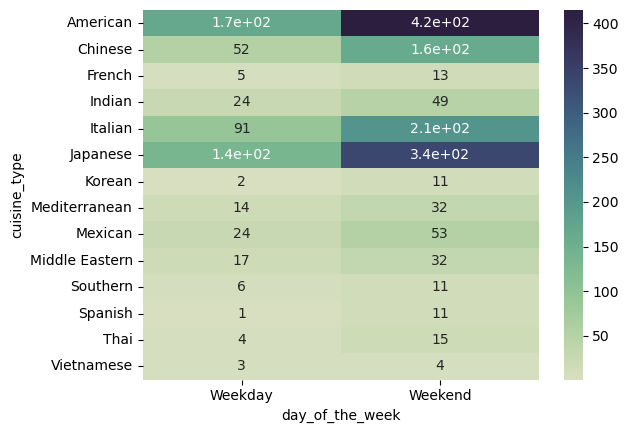

In [32]:
# Pivot DataFrame by cuisine and day of week.
pivot_df = df[['cuisine_type', 'day_of_the_week']].pivot_table(index='cuisine_type', columns='day_of_the_week', aggfunc=len, fill_value=0)

# create the heatmap
sns.heatmap(pivot_df, annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))

### Observation
1. The number of orders is higher on weekends compared to weekdays.
2. The proportion of orders for each customer seems to be consistent, but there is an overall increase in orders on weekends.
3. American cuisine is the most frequently ordered food on weekends.

<AxesSubplot:xlabel='rating', ylabel='cuisine_type'>

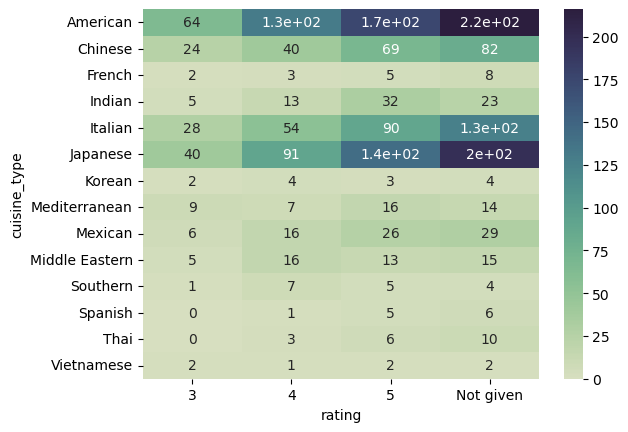

In [33]:
# Pivot DataFrame by cuisine and rating.
pivot_df = df[['cuisine_type', 'rating']].pivot_table(index='cuisine_type', columns='rating', aggfunc=len, fill_value=0)

# create the heatmap
sns.heatmap(pivot_df, annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))

### Observation
1. There is no apparent good or bad ratings for a specific cuisine type. 
2. The count of ratings appears to be directly proportional to the number of orders placed. However, this relationship requires further investigation.

**TODO**: Ordinal encoding. Assign a numerical value to each rating and see if there is a relationship between these numbers and other information we have.

### Numerical Multivariate Anlaysis

<Figure size 1100x900 with 0 Axes>

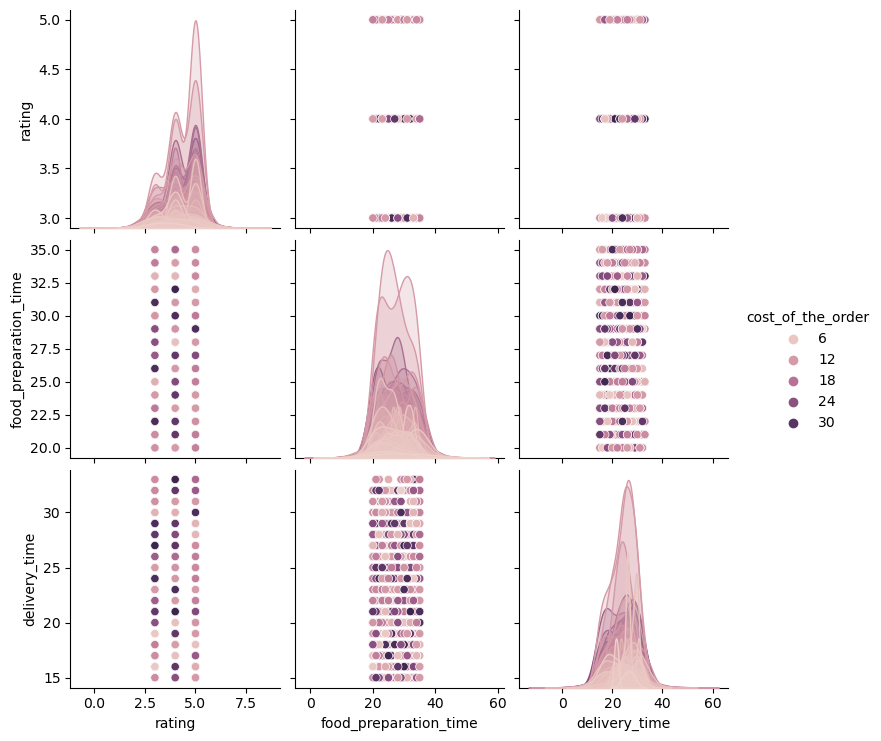

In [34]:
# Exclude orders with no rating given
df_1 = df[df['rating'] != 'Not given']
# Convert rating to integer
df_1['rating'] = df_1['rating'].astype(int)

# Create pariplot
plt.figure(figsize=(11,9))
sns.pairplot(df_1,hue = 'cost_of_the_order')
plt.show()

#### Observation
1. The cost of an order appears to be the strongest factor in determining a 5-star rating. This conclusion can be drawn by observing the light colored data points on the rating vs delivery_time graph.
2. There appears to be no effect on the order rating based on preparation and delivery time.

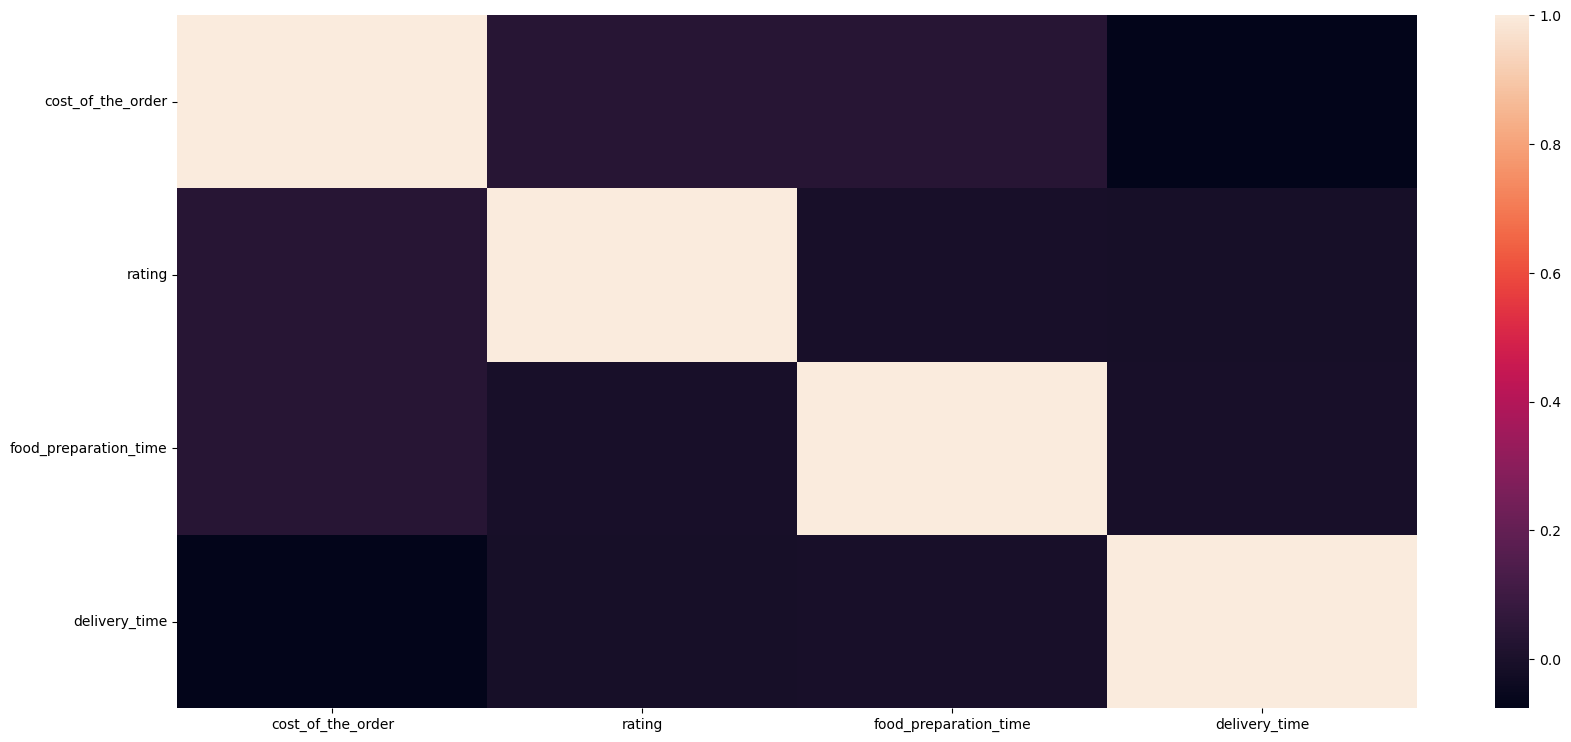

In [35]:
# Build correlation heatmap
corr = df_1.corr()
plt.figure(figsize=(20,9))
ax = sns.heatmap(corr)
plt.yticks(rotation=0)
plt.show()

#### Observation
1. The correlation between the cost of an order and the rating is weak.
2. Additionally, there is also a weak correlation between the cost of an order and the food preparation time.

### Numerical and Categorical Multivariate Analysis

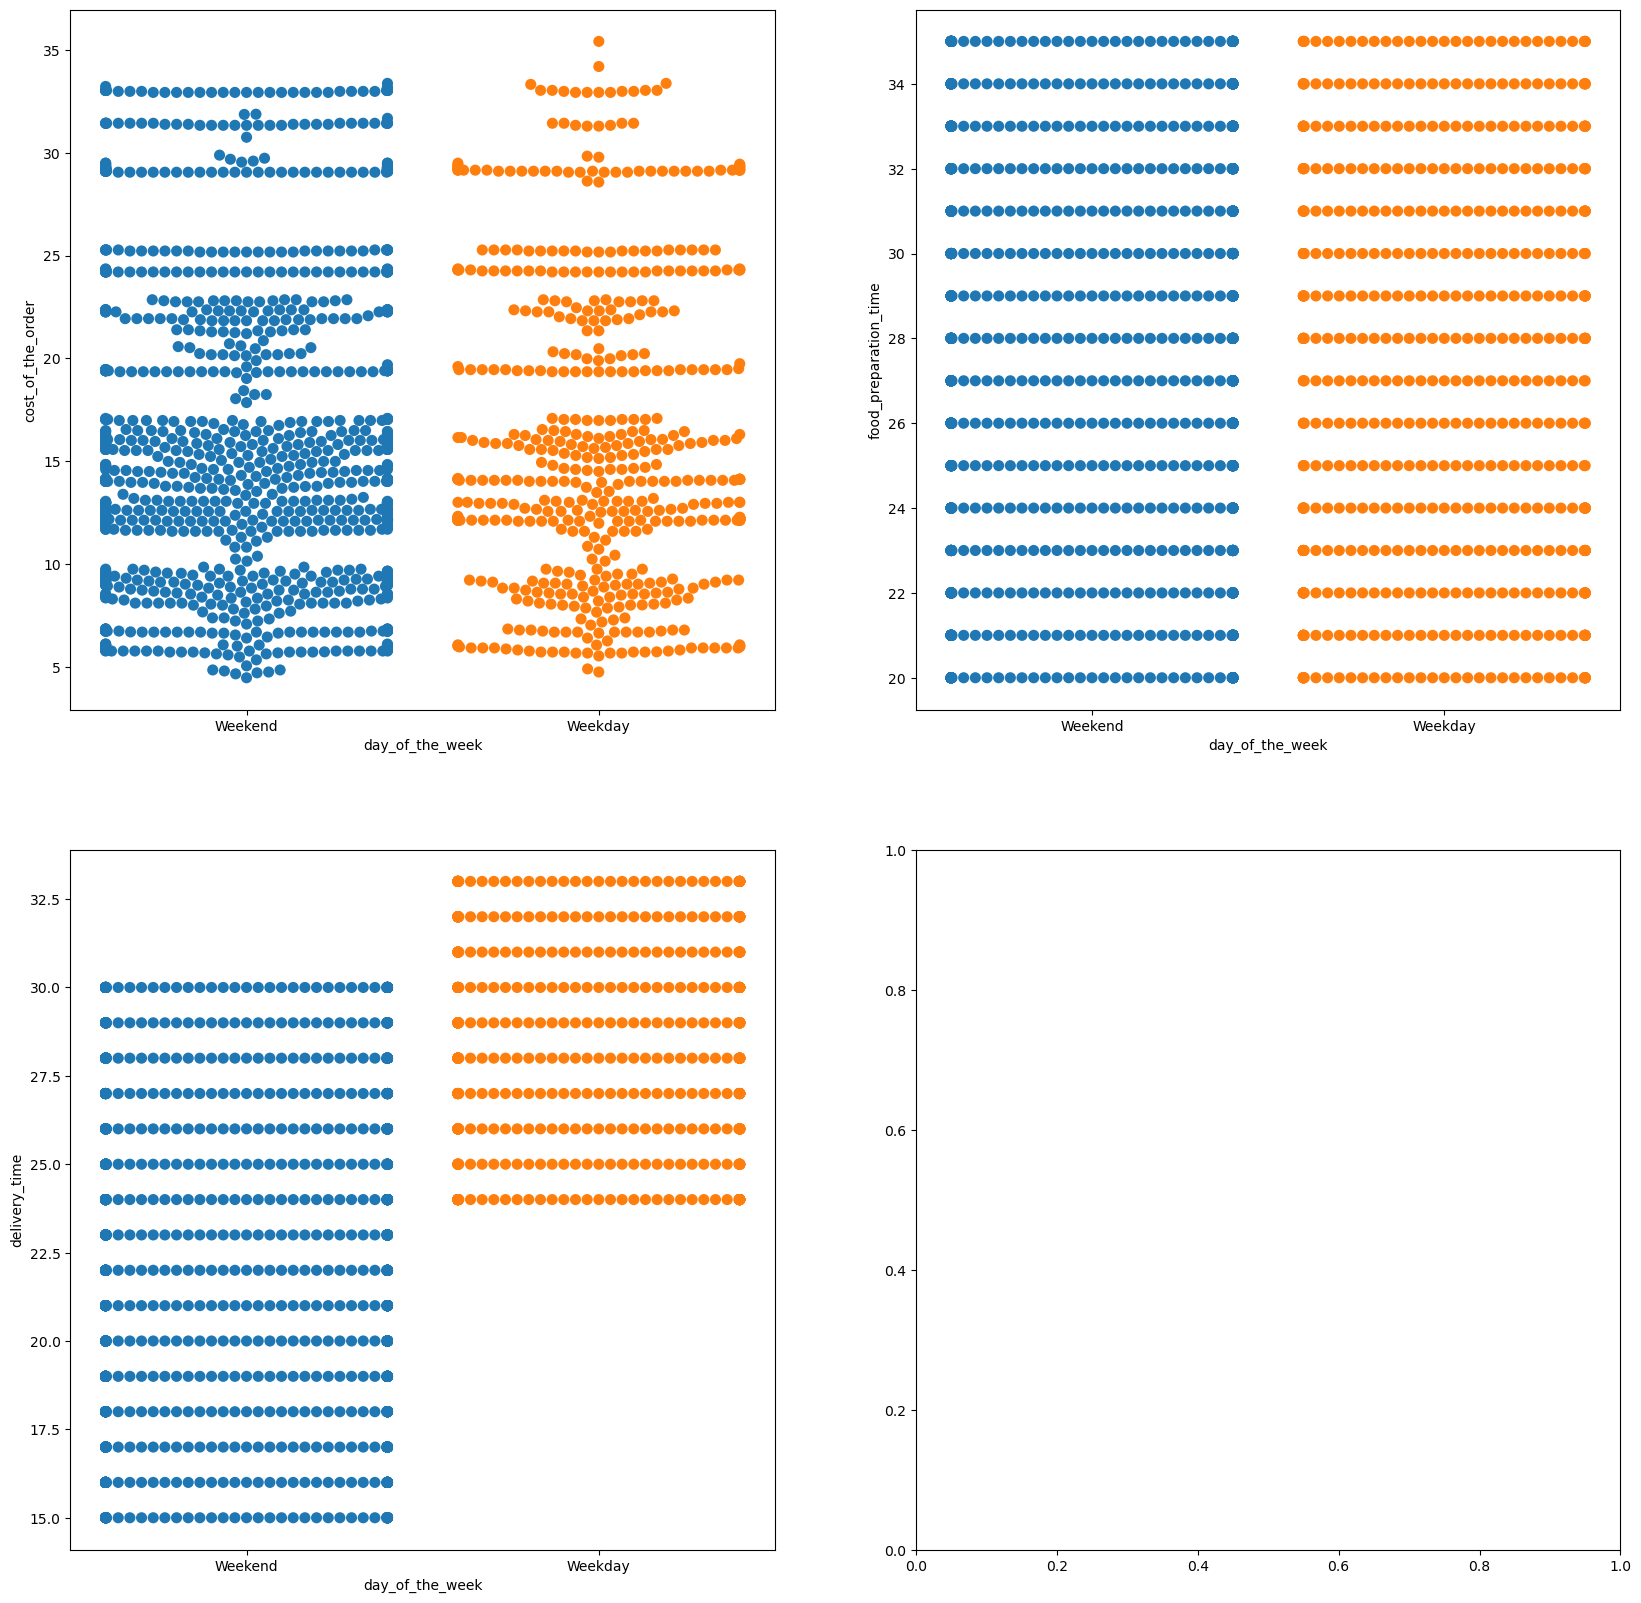

In [36]:
# Analyze day_of_the_week using swarm plot
fig1 , axes = plt.subplots(nrows=2,ncols=2 , figsize = (20,20))
sns.swarmplot(df['day_of_the_week'], df['cost_of_the_order'], ax = axes[0,0], size=8)
sns.swarmplot(df['day_of_the_week'], df['food_preparation_time'] ,ax = axes[0,1], size=8)
sns.swarmplot(df['day_of_the_week'], df['delivery_time'] , ax = axes[1,0] , size=8)
plt.show()

#### Observation
1. There is no clear correlation between day of the week and cost of the order.
2. Day of the week does not have an influence on preparation time.
3. Deliveries on weekdays take longer than on weekends. Specifically, the fastest delivery time on a weekday is approximately 23 minutes, compared to 15 minutes on a weekend.

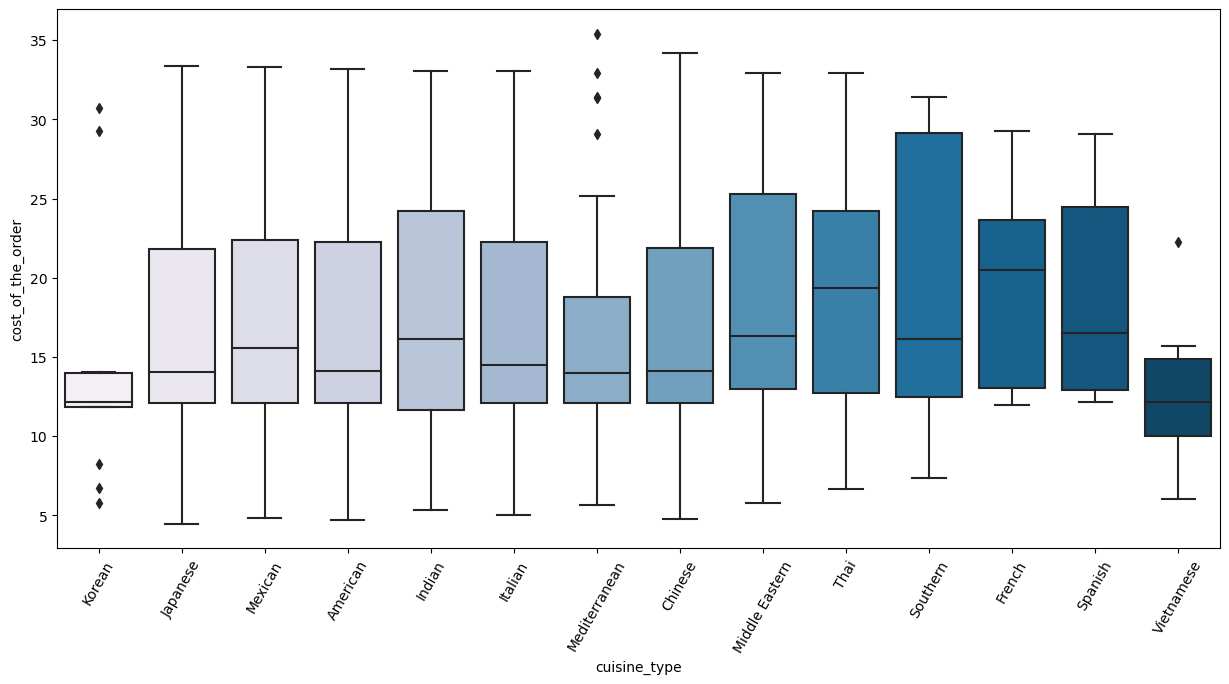

In [37]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations
1. Among all the cuisine types, Korean and Vietnamese  food seem to have the lowest cost per order.

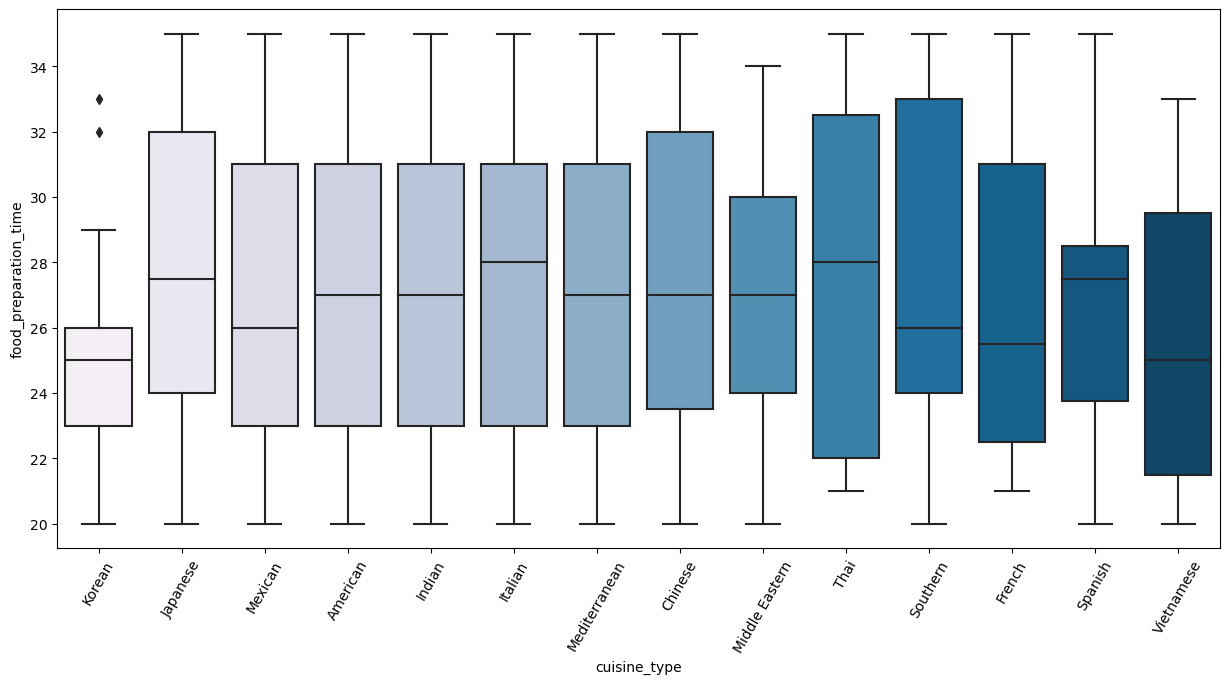

In [38]:
# Relationship between food_preparation_time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observation:
1. The shortest amount of time it takes to prepare a dish appears to be 20 minutes, while the longest time is 35 minutes.

2. Among all types of cuisine, Korean food appears to have the shortest preparation time.

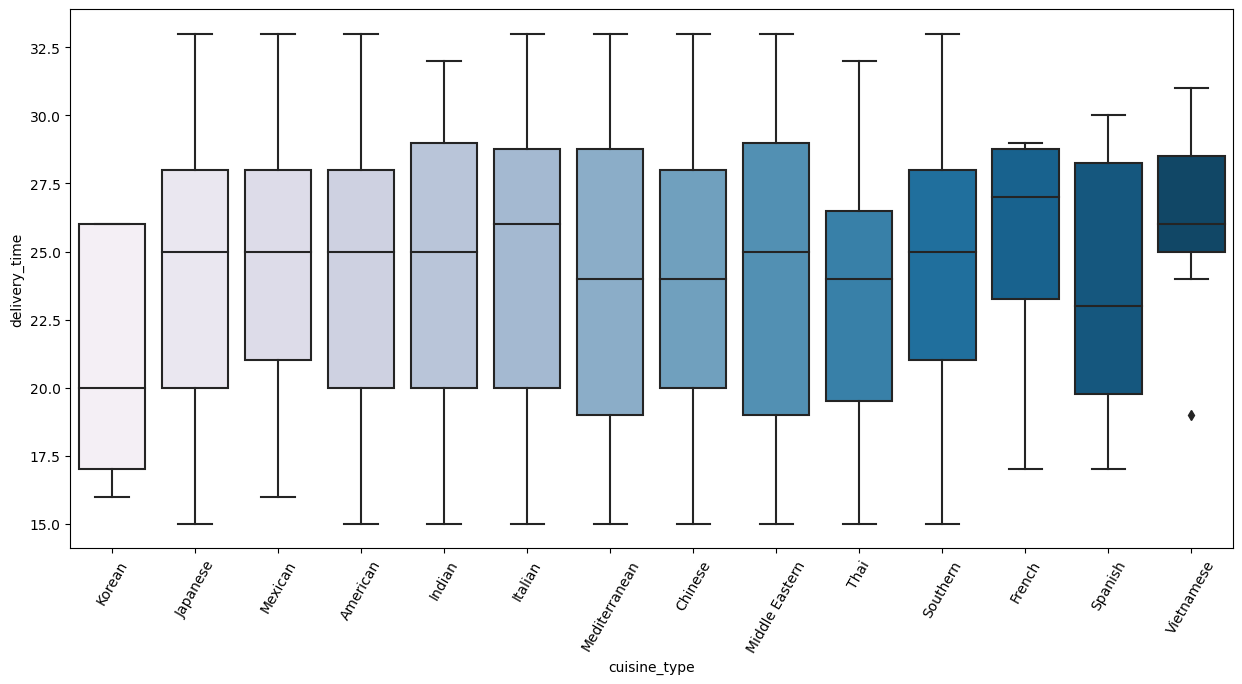

In [39]:
# Relationship between food_preparation_time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations
1. Korean food has the fastest delivery time.
2. Vietnamese food has consistently takes over 22 minutes.

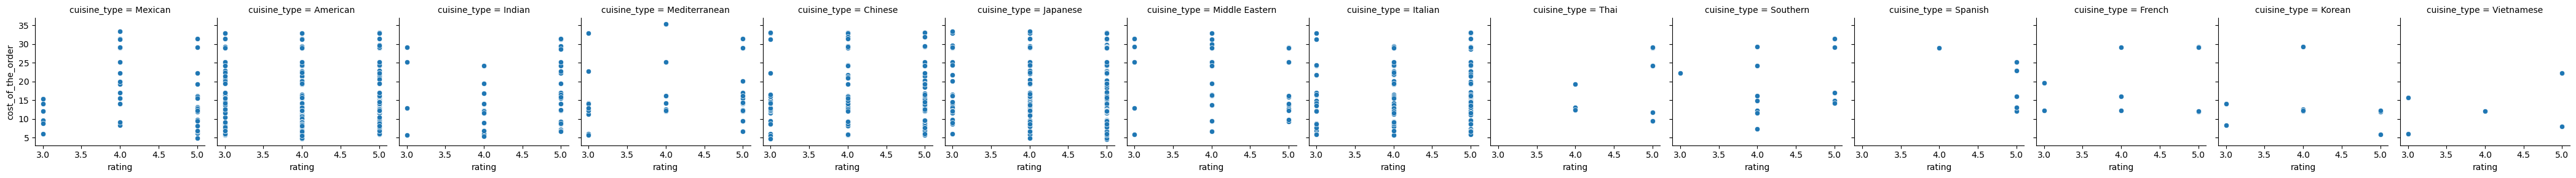

In [40]:
# View relationship of rating vs cost of the order by cuisine type.
g = sns.FacetGrid(df_1, col="cuisine_type")
g.map_dataframe(sns.scatterplot, x="rating", y="cost_of_the_order")


#### Observation
1. For Mexican cuisine, only orders that cost less than `$17` received a 3-star rating. However, it is important to note that not all orders under `$17` were rated 3 stars.
2. There are many cuisine types with low data points which makes it difficult to extract any meaningful insights.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [41]:
# Group by restaurant name. Aggregate by count and mean.
restaurant_stats = df_1.groupby('restaurant_name').agg({'rating': ['count', 'mean']})

# Get restaurants that have more than 50 and the average rating is greater than 4.
promotional_restaurants = restaurant_stats[(restaurant_stats['rating']['count'] > 50) & (restaurant_stats['rating']['mean'] > 4)]

promotional_restaurants

rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905

#### Observations:
1. The restaurants listed below meet two criteria: they have been rated more than 50 times, and they have an average rating of more than 4 stars.

* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Shake Shack
* The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [42]:
# Write the code here
df_1.loc[:, 'revenue'] = df_1.loc[:, 'cost_of_the_order']

# Calculate 25% cut from orders above $20
df_1.loc[df_1['cost_of_the_order'] > 20, 'revenue'] *= .25
# Calculate 15% cut from orders between $20 and $5.
df_1.loc[(df_1['cost_of_the_order'] <= 20) & (df_1['cost_of_the_order'] > 5), 'revenue'] *= .15

print(f"${df_1.revenue.sum():,.2f}")

$3,898.94


#### Observations:
1. Total revenue generated across all orders is $3,424.35

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [43]:
# Add column total_time
df_1['total_time'] = df['food_preparation_time'] + df['delivery_time']

number_of_orders_over_60_min = df_1[df_1['total_time'] > 60].shape[0]

percent_of_order_over_60_min = number_of_orders_over_60_min / df_1.shape[0]

round(percent_of_order_over_60_min,3)

0.102

#### Observations:
1. 10.2% of orders have a total delivery time of 60 minutes or more.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [44]:
# Get mean delivery time of the orders on weekdays and weekends
x = df_1.groupby('day_of_the_week')['delivery_time'].mean().to_frame().T
x

day_of_the_week,Weekday,Weekend
delivery_time,28.305882,22.43674


In [45]:
# Calculate weekday/weekend order percentage difference
(x.Weekday - x.Weekend) / x.Weekend

delivery_time    0.261586
dtype: float64

#### Observations:
1.The delivery time during weekdays is 28.31 minutes, whereas on weekends it is 22.44 minutes. This means that the delivery time is 26.2% longer on weekdays than on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
The dataset consists of 1,898 orders with 9 columns describing the orders. There are no missing values, but a closer inspection of the rating column reveals that there are 736 orders with a "Not given" value, which hides the presence of a missing value. Total revenue generated across all orders is $3,424.35. The main features of interest to understand demand of different restaurants is numbder of orders. To enhance customer expirience we should pay attention to ratings.
#### Number of Orders
* The top three cuisine types are American, Japanese, and Italian and accounts for roughly 70% of total orders.American Cuisine is the most popular on weekends with 415 orders and accounting for 30% of total orders.
* 71% of orders are placed on the weekend. And 29% of orders are placed on weekdays.
* The top 5 restaurants accounts for 33% of the orders. And Shake Shack has the most amount of placed orders at 219.
* Most orders are between `$5` and `$15`, but there are a few high cost orders that are driving up the mean.
#### Ratings
* All ratings are 3 or higher. This could mean that customers are having positive experiences with a rating of 3 or above, or it could suggest that customers are not reporting negative experiences when they have them.
* There is no apparent good or bad ratings for a specific cuisine type.
* The count of ratings appears to be directly proportional to the number of orders placed.
* The medium to low-cost orders appears to be the strongest factor in determining a 5-star rating.
* The correlation between the cost of an order and the rating is weak.
* There appears to be no effect on the order rating based on preparation and delivery time.


### Recommendations:

* **Encourage customers to leave ratings**: To gather more feedback, the business could consider incentivizing customers to rate their orders by offering discounts or rewards, as there are a significant number of orders with missing ratings. Providing discounts or rewards could be seen as a small cost in exchange for valuable customer feedback.
* **Promote popular cuisines**: Promoting cuisines that have already proven to be successful can reduce the investment risk and increase the return on investment.
* **Prioritize weekends**: Similarly, it is important to note that weekends tend to generate more sales. Therefore, it is recommended that the company ensures they have an adequate number of drivers and staff available to meet the increased demand during those periods.
* **Monitor the correlation between cost and rating**: While there appears to be a weak correlation between the cost of an order and the rating, the business should continue to monitor this relationship to ensure that customers feel they are getting value for their money.

---